# Module 6 Lab

## Generalized Linear Models

In [1]:
# Load necessary libraries
import pandas as pd # for data science
import numpy as np  # linear algebra library
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # additional plotting library

### Generating Our DataFrame

To begin this lab, we are going to formulate a randomized dataset with *n*=100 observations. Let's suppose we have a class of 100 students who have taken three exams.

In [2]:
def rand_df(x, y, state): 
    np.random.seed(state) # set seed for reproducibility
    # assign variable to a dataframe through the number 100
    val = pd.DataFrame(np.random.randint(x, y, size=100))
    val = val.round(decimals=0).astype(int) # no decimals, integers
    return val 

In [3]:
df1 = rand_df(0, 100, 42) # exam 1
df2 = rand_df(0, 100, 23) # exam 2
df3 = rand_df(0, 100, 80) # exam 3
df4 = rand_df(0, 20, 36) # study hours

In [4]:
dfs = [df1, df2, df3, df4]
df5 = pd.concat(dfs, join='outer', axis=1)
df5.columns = ['Exam 1', 'Exam 2', 'Exam 3', 'Study_Hours']
df5['Final_Grade'] = df5[['Exam 1', 'Exam 2', 'Exam 3']].mean(axis=1)
# no decimals, integers
df5['Final_Grade'] = df5['Final_Grade'].round(decimals=0).astype(int) 
df5

,Exam 1,Exam 2,Exam 3,Study_Hours,Final_Grade
0,51,83,47,5,60
1,92,40,60,2,64
2,14,73,38,8,42
3,71,54,83,1,69
4,60,31,10,12,34
...,...,...,...,...,...
95,84,81,82,15,82
96,79,32,95,7,69
97,81,53,80,11,71
98,52,35,77,6,55


## Basic Scatterplots

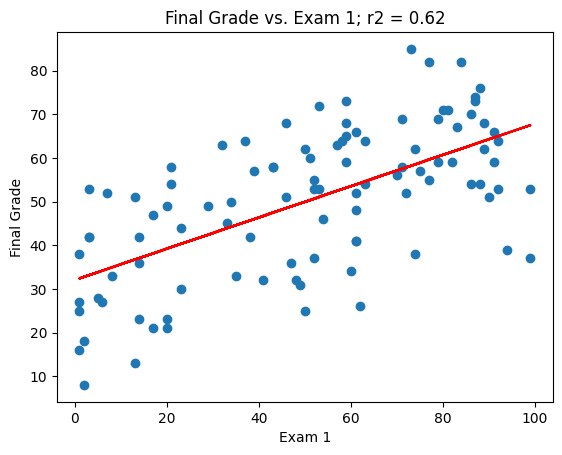

In [6]:
x = df5['Exam 1'] 
y = df5['Final_Grade']
plt.title('Final Grade vs. Exam 1')
plt.xlabel('Exam 1')       
plt.ylabel('Final Grade')           

# create best-fit line based on slope-intercept form
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y) 
plt.plot(x, m*x+b, color = 'red')

# correlation coefficient 
corr = round(np.corrcoef(x, y)[0,1],2)
plt.title('Final Grade vs. Exam 1;' ' r2 = ' + "{:.2f}".format(corr))
plt.show()

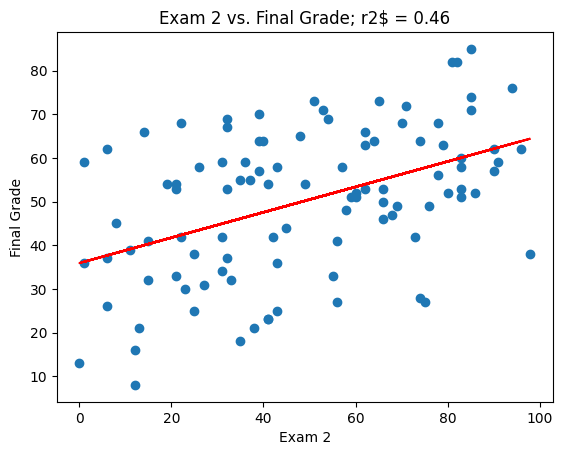

In [7]:
x = df5['Exam 2'] 
y = df5['Final_Grade']
plt.title('Exam 2 vs. Final Grade')
plt.xlabel('Exam 2')       
plt.ylabel('Final Grade')           

# create best-fit line based on slope-intercept form
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y) 
plt.plot(x, m*x+b, color = 'red')
corr = round(np.corrcoef(x, y)[0,1],2)
plt.title('Exam 2 vs. Final Grade;' ' r2$ = ' + "{:.2f}".format(corr))
plt.show()

In [ ]:
x = df5['Exam 3'] 
y = df5['Final_Grade']
plt.title('Exam 3 vs. Final Grade')
plt.xlabel('Exam 3')       
plt.ylabel('Final Grade')           

# create best-fit line based on slope-intercept form
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y) 
plt.plot(x, m*x+b, color = 'red')
corr = round(np.corrcoef(x, y)[0,1],2)
plt.title('Exam 3 vs. Final Grade;' ' $\mathit{r}$ = ' + "{:.2f}".format(corr))
plt.show()

In [ ]:
x = df5['Study_Hours'] 
y = df5['Final_Grade']
plt.title('Exam 3 vs. Final Grade')
plt.xlabel('Study_Hours')       
plt.ylabel('Final Grade')           

# create best-fit line based on slope-intercept form
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y) 
plt.plot(x, m*x+b, color = 'red')
corr = round(np.corrcoef(x, y)[0,1],2)
plt.title('Study Hours vs. Final Grade;' ' $\mathit{r}$ = ' + 
          "{:.2f}".format(corr))
plt.show()

### Scatterplots in a Loop

In [ ]:
y_col = 'Final_Grade'
x_columns = ['Exam 1', 'Exam 2', 'Exam 3', 'Study_Hours']

for x_col in x_columns:
    figure = plt.figure()
    ax = plt.gca()
    m, b = np.polyfit(df5[x_col], df5[y_col], 1)
    plt.plot(df5[x_col], m*df5[x_col]+b, color = 'red')
    ax.scatter(df5[x_col], df5[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    corr = round(np.corrcoef(df5[x_col], df5[y_col])[0,1],2) 
    ax.set_title('{} vs. {};'.format(x_col, y_col) 
                 + ' $\mathit{r}$ = ' 
                 + '{:.2f}'.format(corr))
    plt.show()

## Linear Regression

$y = b_{0} + b_{1}x_{1} + b_{2}x_{2} + ... + b_{n}x_{n} + \varepsilon$

### Simple Linear Regression

* Univariate analysis  
$y = b_{0} + b_{1}x_{1} + \varepsilon$

In [ ]:
# univariate analysis
X1 = df5['Exam 1']
y = df5['Final_Grade']

import statsmodels.api as sm # use stats models for basic linear regression
X1 = sm.add_constant(X1) # adds constant to the model
model = sm.OLS(y, X1).fit()
model.summary()

$y = 32.05 + 0.36 \text{ (Exam 1)} + \varepsilon$

### Multiple Linear Regression

**For the following exercises, we will work with the `Facebook metrics` dataset $^1$**  

https://archive.ics.uci.edu/ml/datasets/Facebook+metrics

In [ ]:
import statsmodels.api as sm
facebook = pd.read_csv('dataset_Facebook.csv', sep=';')

In [ ]:
facebook.head()

**Let's leverage the data to run a linear regression model that predicts the `Total Interactions` (dependent variable ) based on the other columns of data (independent variables $x_1, x_2, x_3, \cdots x_{n}$).**

In [ ]:
# we cannot have non-encoded categorical features in a linear regression model
# since the model only relies on numerical data

facebook['Type'].value_counts() # let's inspect the 'Type' column

In [ ]:
facebook_enc = pd.get_dummies(facebook, columns = ['Type'])
facebook_enc.head()

In [ ]:
facebook_enc.info()

In [ ]:
nulls = pd.DataFrame(facebook_enc.isnull().sum(), columns=['Nulls'])
nulls = nulls[nulls['Nulls']>0]
nulls

In [ ]:
# impute the missing values with mean since few of them
facebook_enc['Paid'].fillna((facebook_enc)['Paid'].mean(), inplace=True)
facebook_enc['like'].fillna((facebook_enc)['like'].mean(), inplace=True)
facebook_enc['share'].fillna((facebook_enc)['share'].mean(), inplace=True)

In [ ]:
# assign independent variables, dependent variable, respectively
x = facebook_enc.loc[:, facebook_enc.columns != 'Total Interactions']
# define the target
y = pd.DataFrame(facebook_enc['Total Interactions'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=42)

In [ ]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

### Multiple Linear Regression with Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, 
                                                    random_state=42)

In [ ]:
sk_model = LinearRegression()

In [ ]:
sk_model.fit(x_train, y_train)

In [ ]:
print('Model Coefficients:', sk_model.coef_)
print()
print('Intercept:', sk_model.intercept_)
coef = pd.DataFrame(sk_model.coef_.T, columns=['Coefficients'])
cols = pd.DataFrame(x.columns, columns=['Columns'])
joined = pd.concat([cols['Columns'], coef['Coefficients']], axis=1)
joined 

In [ ]:
predictions = sk_model.predict(x_test)
pd.DataFrame(predictions, columns=['Predictions'])

In [ ]:
plt.scatter(y_test, predictions)
plt.title('Predictions vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

----------------


$^{1}$ Moro, S., Rita, P., & Vala B. (2016). Predicting social media performance metrics and evaluation 
   of the impact on brand building: A data mining approach. *Journal of Business Research, Elsevier,* 3341–3351.  
   https://doi.org/10.1016/j.jbusres.2016.02.010
   
